# KITTI-MOTS — dataset exploration


In [21]:
from pathlib import Path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

db_path = Path.cwd().parents[4] / "mcv" /"datasets" / "C5" /"KITTI-MOTS"

instances = db_path / "instances"
instances_txt = db_path / "instances_txt"
train = db_path / "training" / "image_02"
test = db_path / "testing" / "image_02"

In [23]:
def list_sequences(path):
    if not path.exists():
        return []
    return sorted([p.name for p in path.iterdir() if p.is_dir()])

seq_inst = list_sequences(instances)
seq_train = list_sequences(train)
seq_test = list_sequences(test)

In [24]:
# Count mask png files per instance sequence and compare with txt if present
mask_counts = {}
txt_counts = {}
for s in seq_inst:
    p = instances / s
    if not p.exists():
        continue
    masks = list(p.glob('*.png'))
    mask_counts[s] = len(masks)
    txtf = instances_txt / f'{s}.txt'
    if txtf.exists():
        try:
            txt_counts[s] = sum(1 for _ in open(txtf))
        except Exception:
            txt_counts[s] = None


items = sorted(mask_counts.items(), key=lambda x: -x[1])
print('sequences by mask count:')
for s,c in items:
    print(f'{s:15} masks={c:4}', ' txt=' + str(txt_counts.get(s, '-')))


sequences by mask count:
0019            masks=1059  txt=8101
0020            masks= 837  txt=6128
0009            masks= 803  txt=3643
0007            masks= 800  txt=2911
0001            masks= 447  txt=3278
0008            masks= 390  txt=1432
0015            masks= 376  txt=1989
0011            masks= 373  txt=3888
0013            masks= 340  txt=1295
0018            masks= 339  txt=1697
0004            masks= 314  txt=1195
0005            masks= 297  txt=1524
0010            masks= 294  txt=951
0006            masks= 270  txt=806
0002            masks= 233  txt=1316
0016            masks= 209  txt=3048
0000            masks= 154  txt=418
0017            masks= 145  txt=923
0003            masks= 144  txt=507
0014            masks= 106  txt=686
0012            masks=  78  txt=282


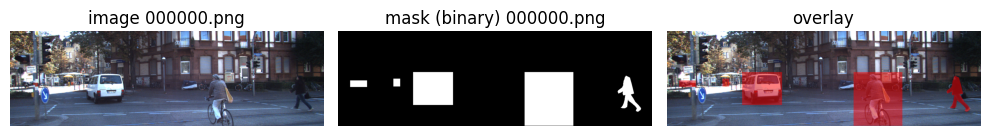

In [ ]:
def show_sample_overlay(seq_name=None):
    if not seq_inst:
        print('No instance sequences available.')
        return
    seq = seq_name or seq_inst[0]

    mask_dir = instances / seq
    img_dir = train / seq

    masks = sorted(mask_dir.glob('*.png'))
    mask_path = masks[0]

    imgs = sorted(img_dir.glob('*.png')) if img_dir.exists() else []
    img_path = imgs[0]

    img = Image.open(img_path).convert('RGB')
    mask = Image.open(mask_path).convert('L')
    img_a = np.array(img)
    mask_a = np.array(mask) > 0

    # overlay red mask with alpha
    overlay = img_a.copy()
    overlay[mask_a, 0] = 255
    overlay[mask_a, 1] = 0
    overlay[mask_a, 2] = 0
    alpha = 0.5
    blended = (img_a * (1-alpha) + overlay * alpha).astype(np.uint8)

    plt.figure(figsize=(10,4))

    plt.subplot(1,3,1)
    plt.imshow(img_a)
    plt.title(f'image {img_path.name}')
    plt.axis('off')

    plt.subplot(1,3,2)
    plt.imshow(mask_a, cmap='gray')
    plt.title(f'mask (binary) {mask_path.name}')
    plt.axis('off')

    plt.subplot(1,3,3)
    plt.imshow(blended)
    plt.title(f'overlay')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

show_sample_overlay()